## Attention

* Кодирование производится с помощью BiLSTM (не принципиально)
* Веса $a_i$ обычно в сумме равны $1$

<img src="images/attention.png" alt="" style="width: 500px;"/>
<img src="https://github.com/KMA504/hse-ami-nlp-course-fall-22/raw/main/seminars/images/attention.png" style="width: 500px;"/>

Визуализируя веса, можно понимать стратегию получения результата (от каких частей контекста зависела каждая из частей выхода).


Пример визуализации весов $attention$ в задаче машинного перевода

<img src="https://github.com/KMA504/hse-ami-nlp-course-fall-22/raw/main/seminars/images/attention_matrix.png" alt="" style="width: 480px;">

При использовании BiLSTM каждый вектор $h_j$ хранит информацию о всей последовательности, но в наибольшей степени о $j$-м слове и его соседях.


Далее при текущем выходе $y_{t−1}$ (с вектором $s_{t−1}$) для вектора каждого входного слова $h_j$ считается $a_{tj}$ – вклад в генерацию следующего выходного вектора ($attention$):

$$a_{tj} = \frac {e^{e_{tj}}} {\sum_k e^{e_{tk}}}$$

где $e_{tj} = f (s_{t−1}, h_j )$ – модель выравнивания

Модель выравнивания предсказывает, насколько хорошо соотносятся входное слово в позиции j и выходное в позиции t (обычно это простая модель, например, однослойная сеть)

#### Multi-head attention

Вход: вектор запроса и несколько пар векторов ключей и значений (ключ и значение обычно совпадают)

<img src="https://github.com/KMA504/hse-ami-nlp-course-fall-22/raw/main/seminars/images/multi-head-attention.png" alt="Drawing" style="width: 400px;"/>

Для запроса и каждого ключа считается вес (линейный слой)
Значения суммируются с этими весами в итоговый вектор

Идея: обучать несколько $attention$, в надежде, что они станут отвечать за разные признаки слов

Результаты пропустим через однослойную сеть, получим на выходе один вектор той же размерности, что и входные вектора.

## Transformer

Состоит из encoder и decoder, в каждом используются $multi$-$head\ attention$ и полносвязные (свёрточные) слои (нет RNN)

Для каждого слова в encoder формируется вектор на основе нескольких слоёв $multi$-$head\ attention$, который передаётся в декодер.

На основании векторов энкодера, а также выходных векторов для уже обработанных слов получается вектор для текущего слова. В обоих случаях используется $multi$-$head\ attention$.

<img src="https://github.com/KMA504/hse-ami-nlp-course-fall-22/raw/main/seminars/images/transformer.png" alt="Drawing" style="width: 500px;"/>

$Positional\ encoding$ – дополнительный вектор признаков для каждого слова, представляющий собой набор значений синусов и косинусов с разными периодами от позиции слова в предложении

В трансформере и в encoder, и в decoder можно использовать несколько последовательных слоёв $multi$-$head\ attention$.

Для большей выразительности и качества добавляют полносвязные слои, а также дропаут, нормализацию по слою и residual connections.

Важная особенность: обучение модели внутри предложения можно распараллелить, в отличие от RNN.

## BERT

$BERT\ (Bidirectional\ Encoder\ Representations\ from\ Transformers)\ -$ многослойный двунаправленный transformer-encoder.

#### Model architecture 

Модель BERT основана на архитектуре Transformer и является усовершенствованием модели GPT от OpenAI.
Модель, в отличие от GPT, является двунаправленной.

Ссылка на оригинальную статью: https://arxiv.org/abs/1810.04805

<img src="https://github.com/KMA504/hse-ami-nlp-course-fall-22/raw/main/seminars/images/bert_model.png" alt="Drawing" style="width: 550px;"/>

Основные параметры модели:
* L – количество $transformer$-блоков 
* H – размер скрытого представления,
* A – количество параллельных слоев в $multi$-$head$ $attention$

Существует две основные модели от Google:

* $BERT_{BASE}$: 
    * L = 12
    * H = 768
    * A = 12, 
    * Total = 110M
$$$$
* $BERT_{LARGE}$: 
    * L = 24
    * H = 1024
    * A = 16, 
    * Total = 340M


Модель обучается на двух задачах: 
* Masked Language Modeling.
* Next sentence prediction.

#### Masked Language Modeling

В отличие от обычного Language Modeling, где предсказывается каждое следующее слово на каждом шаге, в задаче Masked Language Modeling случайные токены заменяются на специальный токен [MASK] и предсказываются только эти "замаскированные" токены.

* 80% времени обучения: Заменим слово на [MASK].
    * my dog is hairy → my dog is [MASK]
* 10% времени обучения: Заменим слово на другое случайное слово 
    * my dog is hairy → my dog is apple
* 10% времени обучения: оставим предложение без изменений. Цель этого - сделать модель смещенной в сторону слова, которое действительно встречалось в корпусе в данном предложении. 
    * my dog is hairy → my dog is hairy. 

#### Next sentence prediction 

Next sentence prediction $-$ задача бинарной классификации. По паре предложений требуется определить, является ли второе предложение продолжением первого.

* Input =[CLS] the man went to [MASK] store [SEP] he bought a gallon [MASK] milk [SEP]
    * Label = IsNext
$$$$
* Input =[CLS] the man [MASK] to the store [SEP] penguin [MASK] are flight ##less birds [SEP]
    * Label = NotNext

#### BERT Embeddings

Посмотрим на эмбеддинги, получаемые с помощью модели BERT. 

Будем использовать модель $BERT_{base}$ из реализации pytorch_pretrained_bert от HuggingFace. 
Ссылка на их гитхаб: https://github.com/huggingface/transformers

Примеры текстов взяты из туториала (https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/)

In [ ]:
import torch
!pip install -q pytorch_pretrained_bert
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
# % matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

     |████████████████████████████████| 123 kB 5.1 MB/s 
     |████████████████████████████████| 131 kB 44.9 MB/s 
     |████████████████████████████████| 8.0 MB 54.3 MB/s 
     |████████████████████████████████| 79 kB 5.9 MB/s 
     |████████████████████████████████| 138 kB 70.6 MB/s 
     |████████████████████████████████| 127 kB 58.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


100%|██████████| 231508/231508 [00:00<00:00, 3132983.36B/s]


In [ ]:
text = "Here is the sentence I want embeddings for."
#text = "Предложение на русском"
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank."
marked_text = "[CLS] " + text + " [SEP]"

print (marked_text)

[CLS] After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank. [SEP]


In [ ]:
tokenized_text = tokenizer.tokenize(marked_text)
print (tokenized_text)

['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', ',', 'the', 'bank', 'robber', 'was', 'seen', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', '[SEP]']


In [ ]:
list(tokenizer.vocab.keys())[5000:5020]


['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [ ]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

for tup in zip(tokenized_text, indexed_tokens):
    print (tup)

('[CLS]', 101)
('after', 2044)
('stealing', 11065)
('money', 2769)
('from', 2013)
('the', 1996)
('bank', 2924)
('vault', 11632)
(',', 1010)
('the', 1996)
('bank', 2924)
('robber', 27307)
('was', 2001)
('seen', 2464)
('fishing', 5645)
('on', 2006)
('the', 1996)
('mississippi', 5900)
('river', 2314)
('bank', 2924)
('.', 1012)
('[SEP]', 102)


In [ ]:
segments_ids = [1] * len(tokenized_text)
print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

100%|██████████| 407873900/407873900 [00:08<00:00, 46111417.08B/s]


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

In [ ]:
# Predict hidden states features for each layer
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)

In [ ]:
print ("Number of layers:", len(encoded_layers))
layer_i = 0

print ("Number of batches:", len(encoded_layers[layer_i]))
batch_i = 0

print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

Number of layers: 12
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


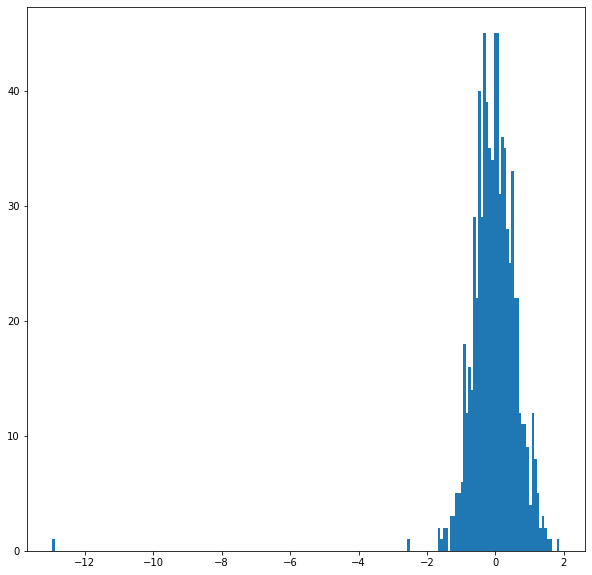

In [ ]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [ ]:
# Convert the hidden state embeddings into single token vectors

# Holds the list of 12 layer embeddings for each token
# Will have the shape: [# tokens, # layers, # features]
token_embeddings = [] 

# For each token in the sentence...
for token_i in range(len(tokenized_text)):
  
  # Holds 12 layers of hidden states for each token 
    hidden_layers = [] 
  
  # For each of the 12 layers...
    for layer_i in range(len(encoded_layers)):
    
    # Lookup the vector for `token_i` in `layer_i`
        vec = encoded_layers[layer_i][batch_i][token_i]

        hidden_layers.append(vec)
    
    token_embeddings.append(hidden_layers)

# Sanity check the dimensions:
print ("Number of tokens in sequence:", len(token_embeddings))
print ("Number of layers per token:", len(token_embeddings[0]))

Number of tokens in sequence: 22
Number of layers per token: 12


In [ ]:
concatenated_last_4_layers = [torch.cat((layer[-1], layer[-2], layer[-3], layer[-4]), 0) for layer in token_embeddings] # [number_of_tokens, 3072]

summed_last_4_layers = [torch.sum(torch.stack(layer)[-4:], 0) for layer in token_embeddings] # [number_of_tokens, 768]

In [ ]:
sentence_embedding = torch.mean(encoded_layers[11], 1)

In [ ]:
print ("Our final sentence embedding vector of shape:"), sentence_embedding[0].shape[0]

Our final sentence embedding vector of shape:


(None, 768)

In [ ]:
print (text)

After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank.


In [ ]:
for i,x in enumerate(tokenized_text):
    print (i,x)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 [SEP]


In [ ]:
print ("First fifteen values of 'bank' as in 'bank robber':")
summed_last_4_layers[10][:15]

First fifteen values of 'bank' as in 'bank robber':


tensor([ 1.1868, -1.5298, -1.3770,  1.0648,  3.1446,  1.4003, -4.2407,  1.3946,
        -0.1170, -1.8777,  0.1091, -0.3862,  0.6744,  2.1924, -4.5306])

In [ ]:
print ("First fifteen values of 'bank' as in 'bank vault':")
summed_last_4_layers[6][:15]

First fifteen values of 'bank' as in 'bank vault':


tensor([ 2.1319, -2.1413, -1.6260,  0.8638,  3.3173,  0.1796, -4.4853,  3.1215,
        -0.9740, -3.1780,  0.1046, -1.5481,  0.4758,  1.1703, -4.4859])

In [ ]:
print ("First fifteen values of 'bank' as in 'river bank':")
summed_last_4_layers[19][:15]

First fifteen values of 'bank' as in 'river bank':


tensor([ 1.1295, -1.4724, -0.7296, -0.0901,  2.4970,  0.5330,  0.9742,  5.1834,
        -1.0692, -1.5941,  1.9261,  0.7119, -0.9809,  1.2127, -2.9812])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compare "bank" as in "bank robber" to "bank" as in "river bank"
different_bank = cosine_similarity(summed_last_4_layers[10].reshape(1,-1), summed_last_4_layers[19].reshape(1,-1))[0][0]

# Compare "bank" as in "bank robber" to "bank" as in "bank vault" 
same_bank = cosine_similarity(summed_last_4_layers[10].reshape(1,-1), summed_last_4_layers[6].reshape(1,-1))[0][0]

In [ ]:
print ("Similarity of 'bank' as in 'bank robber' to 'bank' as in 'bank vault':",  same_bank)

Similarity of 'bank' as in 'bank robber' to 'bank' as in 'bank vault': 0.9456752


In [ ]:
print ("Similarity of 'bank' as in 'bank robber' to 'bank' as in 'river bank':",  different_bank)

Similarity of 'bank' as in 'bank robber' to 'bank' as in 'river bank': 0.67973334


##HuggingFace Pipeline

In [3]:
!pip install transformers
from transformers import pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 13.1 MB/s 
     |████████████████████████████████| 163 kB 45.3 MB/s 
     |████████████████████████████████| 6.6 MB 60.9 MB/s 


No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1232: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, and Four for the House of the Kings:\n\n[1] All four of the Rings come in a pair. Four of'}]

In [4]:
generator = pipeline(task="text-generation")

generator(

    "Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone"

)  # doctest: +SKIP

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, The Seven for Nords under the tower and The Six for Humans in their barracks.\n\nSiege\n\nIn the final'}]

In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

model = AutoModelForCausalLM.from_pretrained("distilgpt2")

generator = pipeline(task="text-generation", model=model, tokenizer=tokenizer)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/353M [00:00<?, ?B/s]

In [6]:
generator(

    "Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone"

)  # doctest: +SKIP

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone!\nIn these seven ways, you'll always be amazed at your success on your first game of this level!\nYou'll also"}]

### Task 1
Try another task with a couple of different models